In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [18]:
pip install openpyxl


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
dataset = pd.read_excel("Superstore_USA.xlsx")

In [4]:
dataset.head(2)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522


In [5]:
dataset.shape

(9426, 24)

In [6]:
dataset.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [7]:
dataset["Product Base Margin"].fillna(dataset["Product Base Margin"].mean(),inplace = True)

In [8]:
dataset.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

# Count of Order Priority

In [9]:
dataset["Order Priority"].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: count, dtype: int64

In [10]:
dataset["Order Priority"].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [11]:
dataset["Order Priority"].replace("Critical ","Critical")

0       Not Specified
1                High
2       Not Specified
3       Not Specified
4       Not Specified
            ...      
9421         Critical
9422         Critical
9423    Not Specified
9424             High
9425    Not Specified
Name: Order Priority, Length: 9426, dtype: object

In [12]:
dataset["Order Priority"] = dataset["Order Priority"].replace("Critical ","Critical")

In [13]:
dataset["Order Priority"].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1805
Name: count, dtype: int64

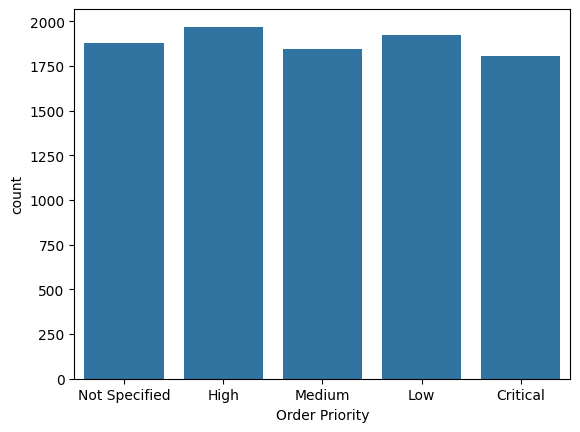

In [14]:
sns.countplot(x="Order Priority",data=dataset)
plt.show()

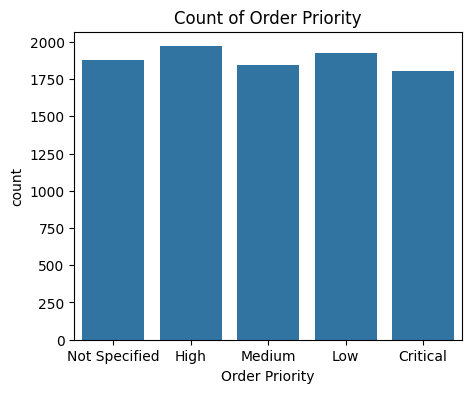

In [16]:
plt.figure(figsize=(5,4))
sns.countplot(x="Order Priority",data=dataset)
plt.title("Count of Order Priority")
plt.savefig("Count of Order Priority")
plt.show()

# Count of Ship mode

In [20]:
dataset["Ship Mode"].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [21]:
dataset["Ship Mode"].value_counts().index

Index(['Regular Air', 'Delivery Truck', 'Express Air'], dtype='object', name='Ship Mode')

In [22]:
x = dataset["Ship Mode"].value_counts().index             # x axis

In [23]:
dataset["Ship Mode"].value_counts().values

array([7036, 1283, 1107], dtype=int64)

In [25]:
y = dataset["Ship Mode"].value_counts().values          # y axis


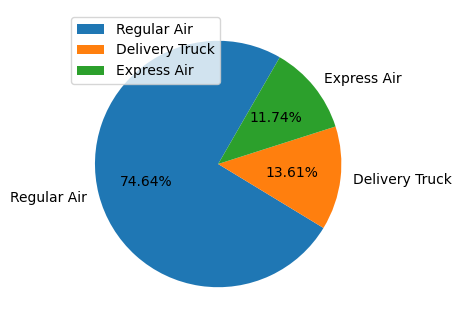

In [28]:
plt.figure(figsize=(5,4))
plt.pie(y,labels=x,startangle=60,autopct="%0.2f%%")
plt.legend(loc=2)
plt.show()

# count of ship mode by product category

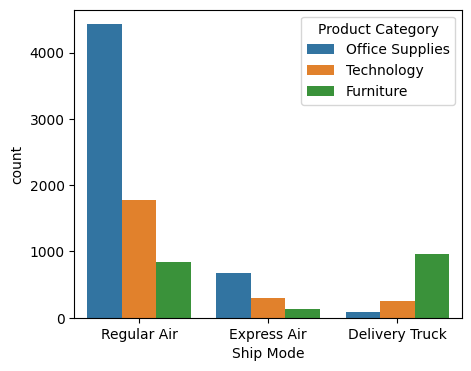

In [30]:
plt.figure(figsize=(5,4))
sns.countplot(x="Ship Mode",data=dataset,hue="Product Category")
plt.show()

# Count of Customer Segment

In [31]:
dataset["Customer Segment"].value_counts()

Customer Segment
Corporate         3375
Home Office       2316
Consumer          1894
Small Business    1841
Name: count, dtype: int64

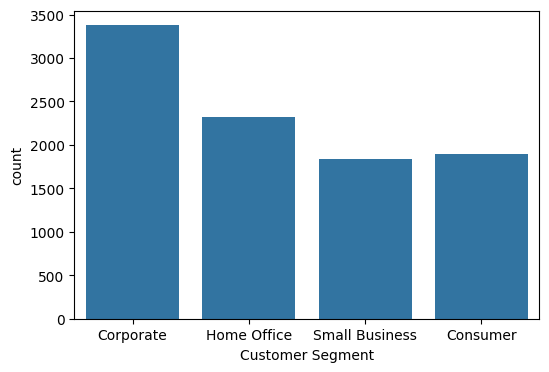

In [33]:
plt.figure(figsize=(6,4))
sns.countplot(x="Customer Segment",data=dataset)
plt.show()

# Count of Product Category

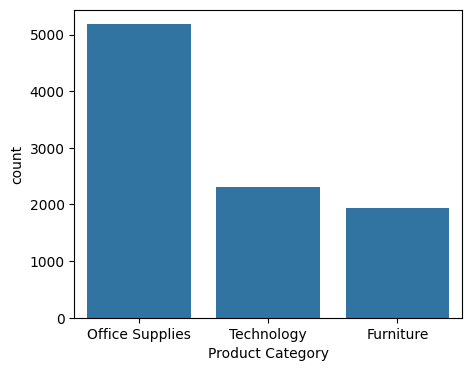

In [34]:
plt.figure(figsize=(5,4))
sns.countplot(x="Product Category",data=dataset)
plt.show()

# Count of product category by product sub category

In [38]:
dataset["Product Category"].value_counts()

Product Category
Office Supplies    5181
Technology         2312
Furniture          1933
Name: count, dtype: int64

In [49]:
gb = dataset.groupby("Product Category").agg({"Product Sub-Category":"count"})
gb

,Product Sub-Category
Product Category,
Furniture,1933
Office Supplies,5181
Technology,2312


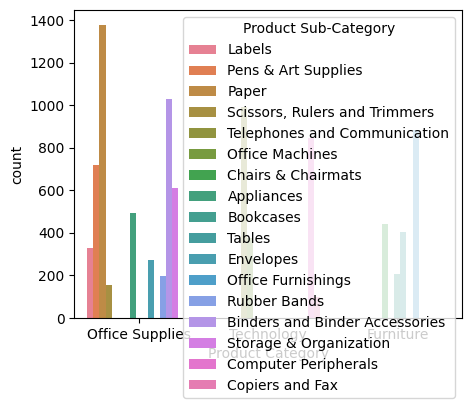

In [35]:
plt.figure(figsize=(5,4))
sns.countplot(x="Product Category",data=dataset,hue="Product Sub-Category")
plt.show()

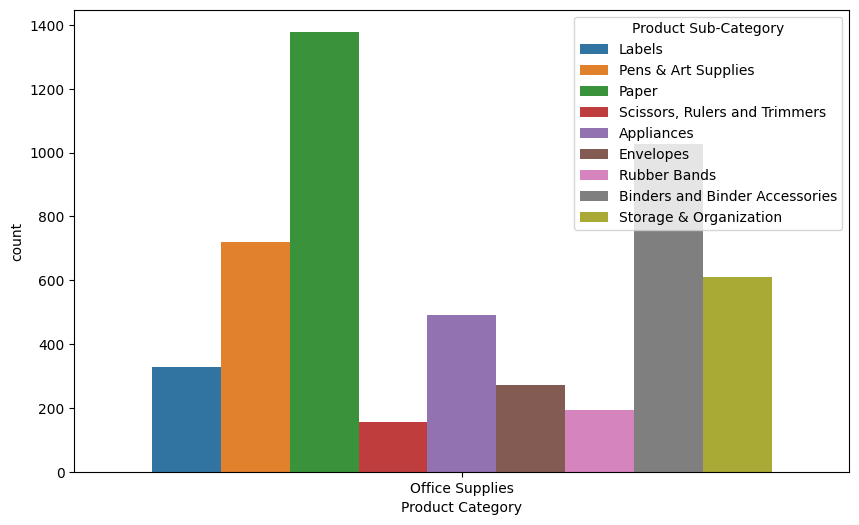

In [37]:
# Count of Office Supplies product category by Product sub category. 


plt.figure(figsize=(10,6))
sns.countplot(x="Product Category",data=dataset[dataset["Product Category"]=="Office Supplies"],hue="Product Sub-Category")
plt.show()

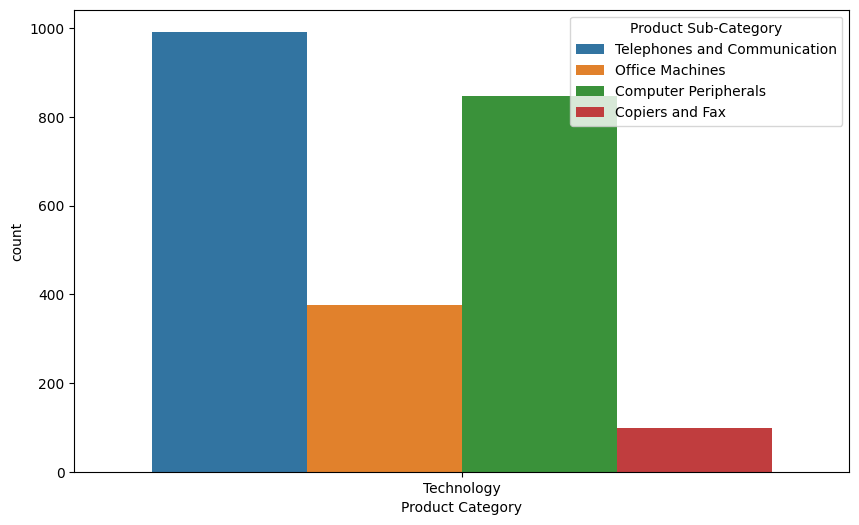

In [39]:
# Count of Technology Product Category by sub category.

plt.figure(figsize=(10,6))
sns.countplot(x="Product Category",data=dataset[dataset["Product Category"]=="Technology"],hue="Product Sub-Category")
plt.show()

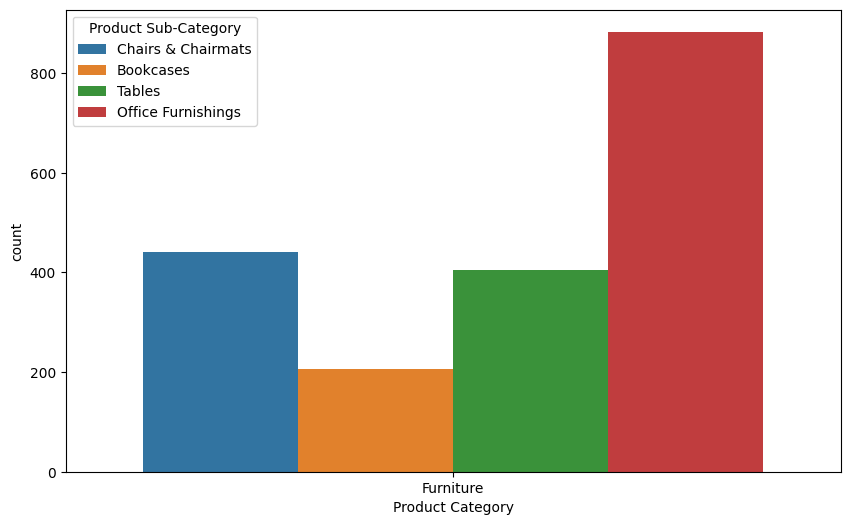

In [40]:
# Count of  Furniture product category by sub category.

plt.figure(figsize=(10,6))
sns.countplot(x="Product Category",data=dataset[dataset["Product Category"]=="Furniture"],hue="Product Sub-Category")
plt.show()

In [46]:
# Count of Order ID by Product sub Category.

dataset["Product Sub-Category"].value_counts()

Product Sub-Category
Paper                             1379
Binders and Binder Accessories    1028
Telephones and Communication       992
Office Furnishings                 883
Computer Peripherals               846
Pens & Art Supplies                721
Storage & Organization             610
Appliances                         492
Chairs & Chairmats                 440
Tables                             404
Office Machines                    376
Labels                             329
Envelopes                          272
Bookcases                          206
Rubber Bands                       195
Scissors, Rulers and Trimmers      155
Copiers and Fax                     98
Name: count, dtype: int64

In [69]:
# Count of Order ID by Product sub Category.

gb = dataset.groupby("Product Sub-Category").agg({"Order ID":"count"})
gb

,Order ID
Product Sub-Category,
Appliances,492
Binders and Binder Accessories,1028
Bookcases,206
Chairs & Chairmats,440
Computer Peripherals,846
Copiers and Fax,98
Envelopes,272
Labels,329
Office Furnishings,883


In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [53]:
# Extracting year from Order Date.

dataset["Order Date"].dt.year

0       2012
1       2010
2       2011
3       2011
4       2011
        ... 
9421    2013
9422    2013
9423    2013
9424    2010
9425    2013
Name: Order Date, Length: 9426, dtype: int32

In [56]:
# Creating new column named "Order Year".

dataset["Order Year"] = dataset["Order Date"].dt.year

In [57]:
dataset.info()                                  # Order Year column has been added to the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [58]:
# count of Order Id by Order Year.

dataset["Order Year"].value_counts()

Order Year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

In [60]:
# count of Order Id by Order Year.

gb = dataset.groupby("Order Year").agg({"Order ID":"count"})
gb

,Order ID
Order Year,
2010,1952
2011,2179
2012,2241
2013,3054


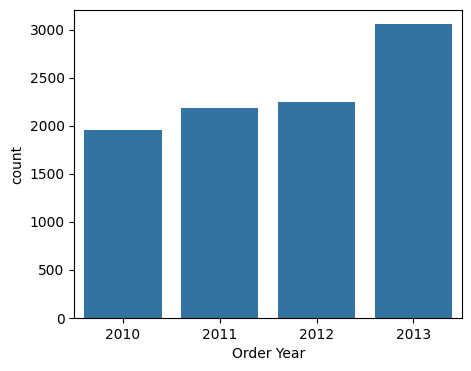

In [62]:
plt.figure(figsize=(5,4))
sns.countplot(x="Order Year",data=dataset)
plt.show()

In [63]:
# Extracting year from Order Date.

dataset["Order Date"].dt.month

0       5
1       7
2       7
3       7
4       7
       ..
9421    5
9422    5
9423    9
9424    2
9425    9
Name: Order Date, Length: 9426, dtype: int32

In [64]:
# Creating new column named "Order Month".

dataset["Order Month"] = dataset["Order Date"].dt.month

In [65]:
dataset.info()      # Order Month column has been added to the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [66]:
# Count of Order ID by Order Month.

dataset["Order Month"].value_counts()

Order Month
5     866
10    827
12    818
9     817
1     798
3     796
7     785
8     784
4     764
2     731
6     728
11    712
Name: count, dtype: int64

In [68]:
# Count of Order ID by Order Month.

gb = dataset.groupby("Order Month").agg({"Order ID":"count"})
gb

,Order ID
Order Month,
1,798
2,731
3,796
4,764
5,866
6,728
7,785
8,784
9,817


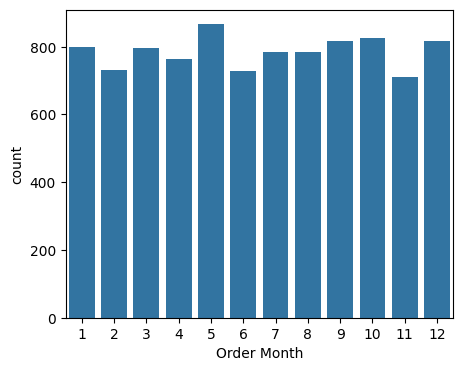

In [73]:
plt.figure(figsize=(5,4))
sns.countplot(x="Order Month",data=dataset)
plt.show()

# Sum of Profit by Product Category

In [75]:
gb = dataset.groupby("Product Category").agg({"Profit":"sum"})
gb

,Profit
Product Category,
Furniture,177354.298188
Office Supplies,451990.216492
Technology,683097.884748


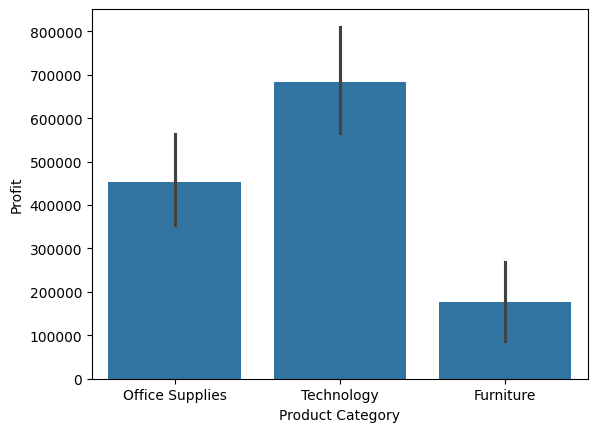

In [76]:
sns.barplot(x="Product Category",y="Profit",data=dataset,estimator='sum')
plt.show()

# Sum of Sales by State or Province.

In [78]:
gb = dataset.groupby("State or Province").agg({"Sales":"count"})
gb

,Sales
State or Province,
Alabama,125
Arizona,134
Arkansas,123
California,1021
Colorado,177
Connecticut,82
Delaware,15
District of Columbia,68
Florida,522


In [82]:
dataset["State or Province"].value_counts()[:5]      # [:5] indicates Top 5.

State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64

# count to Product Based Margin by Product Category.

In [89]:
dataset["Product Base Margin"].value_counts()

Product Base Margin
0.37    855
0.38    754
0.36    695
0.59    563
0.39    541
0.57    523
0.56    510
0.40    469
0.58    430
0.55    355
0.60    329
0.35    296
0.52    172
0.74    119
0.43    117
0.41    115
0.65    111
0.64    110
0.44    107
0.78    100
0.49    100
0.75     93
0.83     90
0.48     89
0.66     89
0.62     87
0.54     87
0.46     86
0.69     86
0.42     86
0.81     82
0.50     81
0.61     81
0.77     77
0.68     75
0.51     74
0.79     74
0.71     67
0.45     60
0.76     60
0.80     55
0.73     55
0.47     54
0.67     43
0.85     40
0.63     40
0.70     39
0.72     38
0.82     34
0.53     32
0.84     29
Name: count, dtype: int64

# Sum of Product Base margin by Product Category.

In [91]:
gb = dataset.groupby("Product Category").agg({"Product Base Margin":"sum"})
gb

,Product Base Margin
Product Category,
Furniture,1127.68
Office Supplies,2376.77
Technology,1286.57


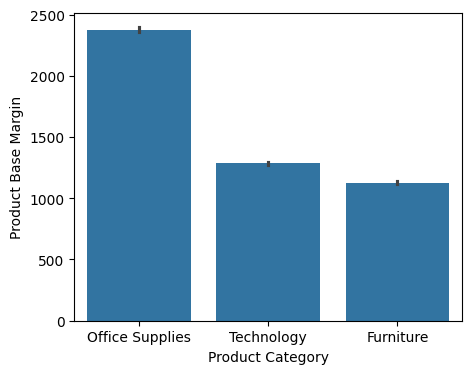

In [93]:
plt.figure(figsize=(5,4))
sns.barplot(x="Product Category",y="Product Base Margin",data=dataset,estimator='sum')
plt.show()